In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "ohmtrivedi1998"
os.environ['KAGGLE_KEY'] = "6d6475d130e00edf3363ae86f2a3bd5f"

In [ ]:
!kaggle competitions download -c digit-recognizer

 82% 5.00M/6.09M [00:00<00:00, 29.0MB/s]
100% 6.09M/6.09M [00:00<00:00, 29.7MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 75.5MB/s]
 55% 5.00M/9.16M [00:00<00:00, 15.0MB/s]
100% 9.16M/9.16M [00:00<00:00, 26.3MB/s]


In [ ]:
!unzip train.csv.zip -d train
!unzip test.csv.zip -d test

Archive:  train.csv.zip
  inflating: train/train.csv         
Archive:  test.csv.zip
  inflating: test/test.csv           


In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("/content/train/train.csv")

In [ ]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X = train.drop("label",axis=1)

In [ ]:
Y = train["label"]

In [ ]:
import numpy as np

In [ ]:
X = np.array(X)

0


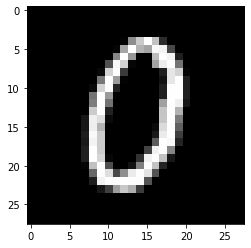

In [ ]:
plt.imshow(X[5].reshape(28,28),cmap="gray")
print(Y[5])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state = 24)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
X_train.shape

(31500, 784)

In [ ]:
model = Sequential()
model.add(Dense(X_train.shape[1],activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
h = model.fit(X_train,Y_train,epochs=100,batch_size=500)

Epoch 1/100
63/63 [==============================] - 0s 4ms/step - loss: 12.1888 - accuracy: 0.7545
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.8663
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 0.3829 - accuracy: 0.9096
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 0.2565 - accuracy: 0.9318
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 0.1839 - accuracy: 0.9482
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 0.1356 - accuracy: 0.9592
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 0.1036 - accuracy: 0.9688
Epoch 8/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0770 - accuracy: 0.9757
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9806
Epoch 10/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0456 - accuracy: 0.9849
Epoch 11

In [ ]:
loss = h.history["loss"]
accuracy = h.history["accuracy"]

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


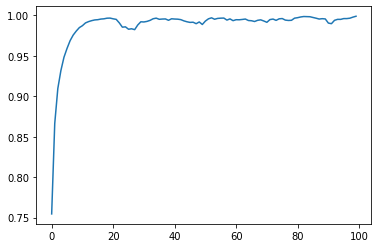

In [ ]:
sns.lineplot(range(0,len(loss)),accuracy)

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred[58]

array([1.0000000e+00, 0.0000000e+00, 1.3838936e-31, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 6.1842730e-31], dtype=float32)

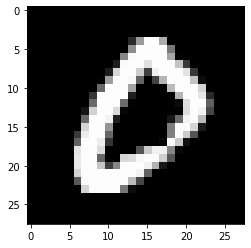

In [ ]:
plt.imshow(X_test[58].reshape(28,28),cmap="gray")

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
res = []
for i in pred:
  res.append(np.argmax(i))

In [ ]:
accuracy_score(Y_test,res)

0.8953333333333333

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=10)

In [ ]:
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
pred_kmeans = km.predict(X_test)

In [ ]:
accuracy_score(Y_test,pred_kmeans)

0.04123809523809524